# Project 2: Milestone 2 - White Paper (Code)
### DSC680-T301 Applied Data Science
### Joshua Greenert
### 4/15/2023

In [11]:
# Set some required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the dataframes
df_telecom = pd.read_csv('telecomChurn.csv')
df_bank = pd.read_csv('bankChurn.csv')

## Data Preparation

In [12]:
# Prepare the telecom data.
# Replace all values of yes and no values for churn column to 1s and 0s; can't use dummies 
# since they would make separate columns
df_telecom['Churn'].replace({'Yes': 1, 'No': 0}, inplace = True)

# Select the columns to make dummies for.
dummy_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

df_telecom = pd.concat([df_telecom, pd.get_dummies(df_telecom[dummy_columns])], axis = 1)

# drop the original categorical columns that are now represented as dummies
df_telecom.drop(dummy_columns, axis = 1, inplace = True)

# drop the customer Id column as it can lead to overfitting/noise.
df_telecom.drop('customerID', axis = 1, inplace = True)

# Show the head
df_telecom.head(3)

In [21]:
# Prepare the bank data.
# Make dummies for the country and gender columns
dummy_columns = [ 'gender']

# Create dummies and add them to the dataframe.
df_bank = pd.concat([df_bank, pd.get_dummies(df_bank[dummy_columns])], axis = 1)

# drop the original categorical columns that are now represented as dummies
df_bank.drop(dummy_columns, axis = 1, inplace = True)

# Drop the columns that will hold no value or will create too many features.
df_bank.drop(['customer_id', 'country'], axis=1, inplace=True)

df_bank.head(3)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0


## Visualizations

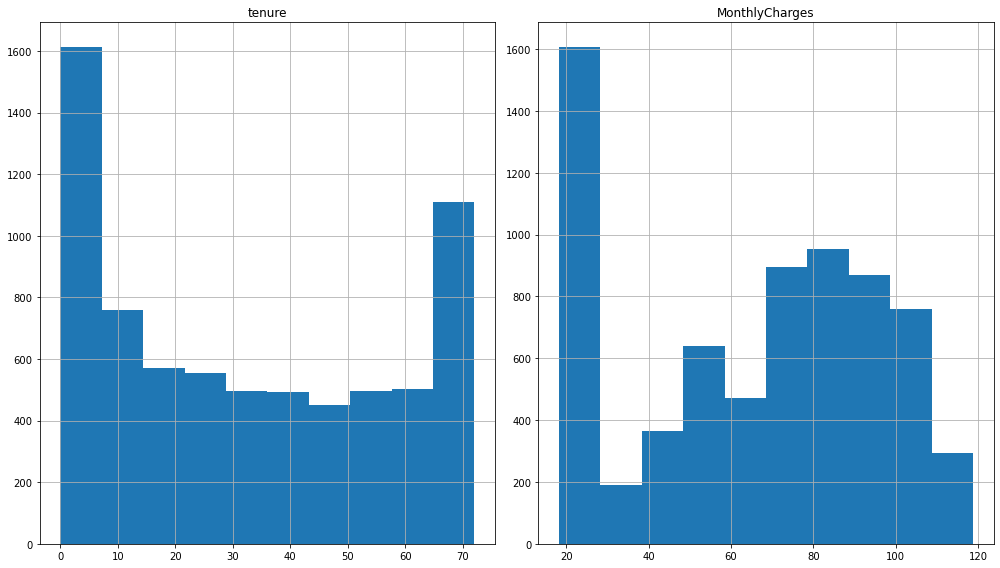

In [18]:
# create histograms of tenure, MonthlyCharges, and TotalCharges
df_telecom[['tenure', 'MonthlyCharges', 'TotalCharges']].hist(figsize=(14, 8))
plt.tight_layout()
plt.show()